# Heat Simulation with Python

You have seen that the resistance of a battery is highly dependent of the Temperature of the Cell. After Charging a Battery you know that it has a constant Temperature of 60 °C. You want to know how long it takes until the Battery has a lower Temperature that 40 °C for safe usage.

Therefore you want to calculate with python how long it takes approximately.

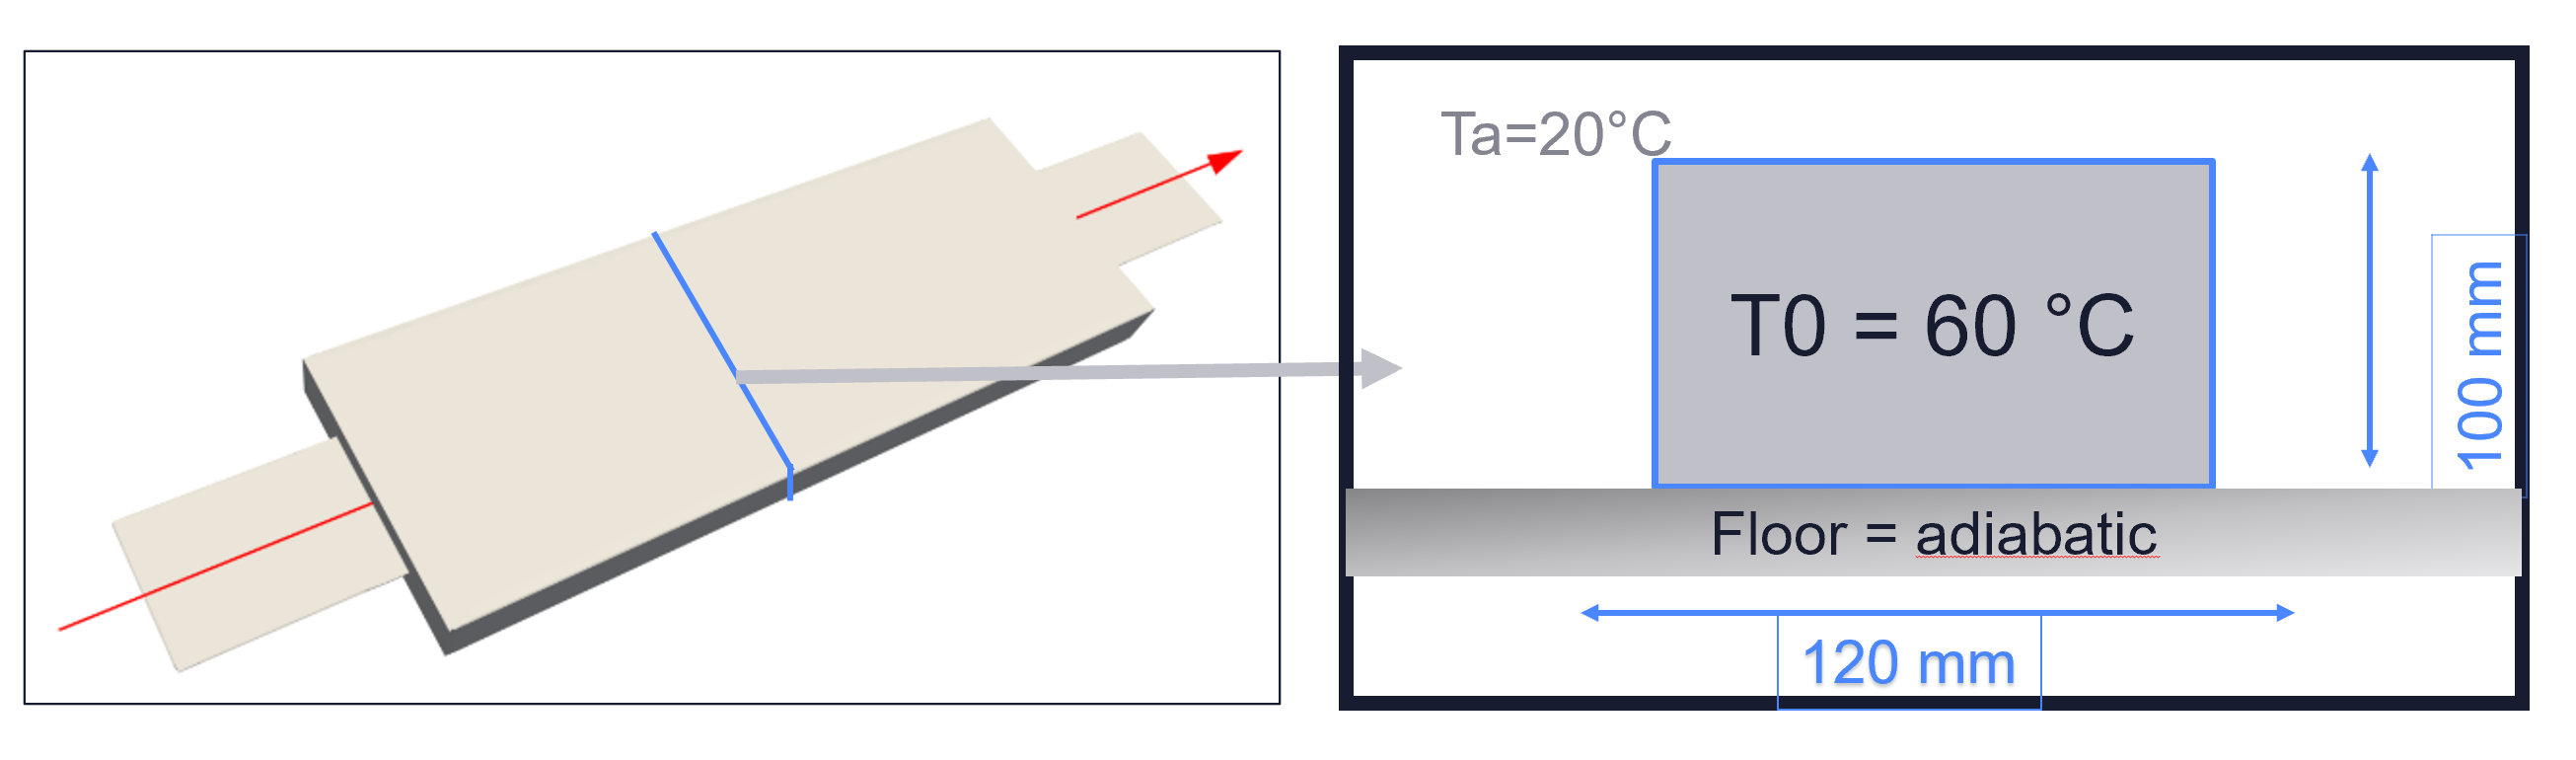


- For a first approximation you estimate that most of the heat dissolves over the cell surface (no Heat dissolving over the front edges). 
- The Battery lies on the isolated surface and no Heat exchange with the floor takes place (adiabatic)
- The Temperature in the Environment has constant 20 °C

|   |   |
|---|---|
|  specific density | 2200 kg/m^3  |
| thermal conductivity  |  140 W/(m*K) |
| spezific heat capacity  |  0.720 J/(Kg K)|

## Theory

Heat equation for 3 Dimensions for solids 
further Information: https://en.wikipedia.org/wiki/Heat_equation

\begin{equation}
\rho \cdot c_p \cdot \frac{\delta T}{\delta t} = \nabla (\lambda \cdot \nabla T) + \dot{q}
\end{equation}

With $\dot{q}$ being the heat source term. We want to assume that the heat source term ist negligible and we have Isotropic and temperature independent material constants. 

\begin{equation}
\rho \cdot c_p \cdot \frac{\delta T}{\delta t} = \lambda \cdot \Delta T 
\end{equation}

We want assume that there ist no heat exchange with the front edges so we have a 2 dimensional Problem only:

\begin{equation}
\rho \cdot c_p \cdot \frac{\delta T}{\delta t} = \lambda \left(\frac{\delta ^2 T}{\delta x^2}+  \frac{\delta ^2 T}{\delta y^2}\right)
\end{equation}

How to solve Equations like this in Python?
1. Define all necessary parameters
1. create an Array and Apply all the starting values
1. Implement the formula
1. Write a foor loop for every array cell

In [8]:
#1. Define parameters
# Size of the 2D Array (Always use SI numbers)
xMin = 0    #m
xMax = 0.12  #m
yMin = 0    #m
yMax = 0.1  #m

# material parameter (We will use graphit for this example)
rho    = 2100 #kg/m³ (Graphite 1,9 to 2,3 g/cm3)
cp     = 715  #J/(kg*K)
Lambda = 140   #W/(m*K)


## How to calculate this numerically?

We will calculate the differential equation with the help of the finite difference method. 

Divide the area you want to calculate in multible cells
Therefor we use an Numpy Array!

For the time we get:

\begin{equation}
 \frac{\delta T}{\delta t}  \approx  \frac{T^{n+1}-T^n}{\Delta t}
\end{equation}

For the second derivative of the place we get:

\begin{equation}
 \frac{\delta ^2 T}{\delta y^2}\  \approx  \frac{T_{i+1,j} - 2T_{i,j}+ T_{i,j-1}}{(\Delta y)^2}
\end{equation}

\begin{equation}
\rho \cdot c_p \cdot  \frac{T^{n+1}-T^n}{\Delta t} = \lambda \left(\frac{T_{i+1,j} - 2T_{i,j}+ T_{i-1,j}}{(\Delta x)^2}+  \frac{T_{i,j+1} - 2T_{i,j}+ T_{i,j-1}}{(\Delta y)^2}\right)
\end{equation}

with $a=\lambda/(\rho \cdot c_p)$ we can get a explicit form for this equation:

\begin{equation}
T^{n+1} = T_{i,j}^n + a \Delta t \cdot \left(\frac{T_{i+1,j} - 2T_{i,j}+ T_{i-1,j}}{(\Delta x)^2}+  \frac{T_{i,j+1} - 2T_{i,j}+ T_{i,j-1}}{(\Delta y)^2}\right)
\end{equation}

We will try to implement this formula in Python. 

Further Information on finite difference method especially on the Heat equation can be found at Wikipedia:
https://en.wikipedia.org/wiki/Finite_difference_method

We will now focus on the implementation in Python! I will try to explain every step in detail. 

Numerical Math:
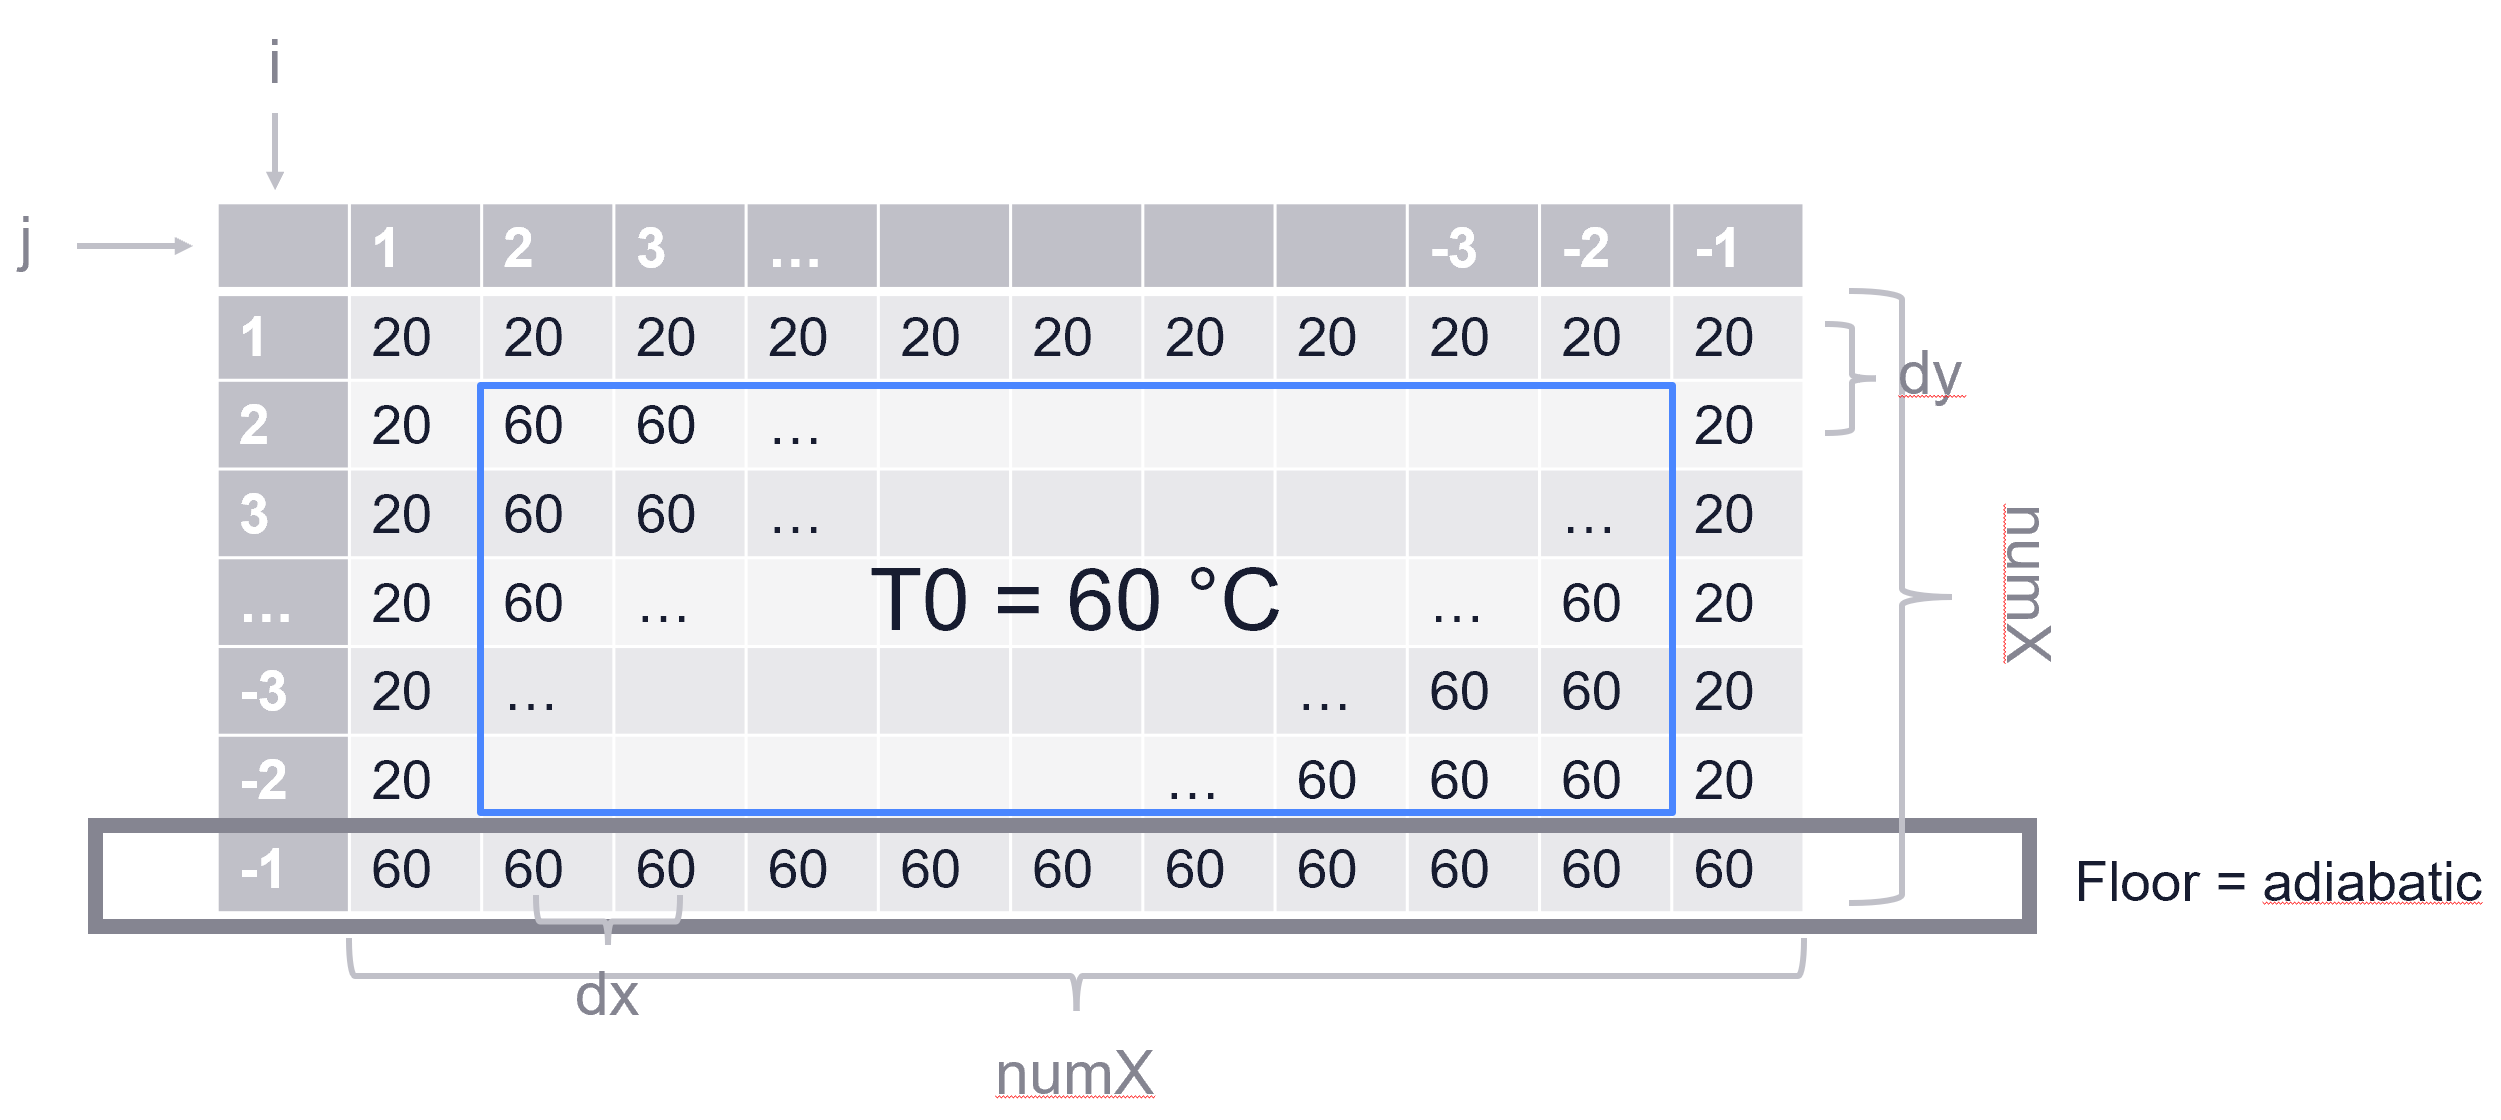


So lets start with creating an array!

Digression: Link to [Manipulating Arrays](Manipulating_Arrays.ipynb)

Now we have to assign the Values we know already to our Array!
- Those are called boundary conditions

In [10]:
T0 = 60 # °C

T_A = 20

T_t0= T_t0*T0
print(T_t0)

[[60. 60. 60. ... 60. 60. 60.]
 [60. 60. 60. ... 60. 60. 60.]
 [60. 60. 60. ... 60. 60. 60.]
 ...
 [60. 60. 60. ... 60. 60. 60.]
 [60. 60. 60. ... 60. 60. 60.]
 [60. 60. 60. ... 60. 60. 60.]]


Now let's see if we did everything correct. Therefore we will visualize the grid with the help of pcolormesh
Digression: Link to [Heat map](Digression_Pcolormesh.ipynb)

Now 

Now we need to implement the formula in for loops
- First loop for timesteps
- A loop in y direction
- A loop in x direction

Lets have a quick look in the for loop section. 
Digression: Link to [for loops](03_Digression_forloops.ipynb)

## Now we want create a heat map with Seaborn!
Really good documentation
https://seaborn.pydata.org/generated/seaborn.heatmap.html